In [2]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# matplotlib plotting parameters
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times'
mpl.rcParams['figure.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

# подключаем пакеты для рендеринга русского текста в LaTeX
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('text.latex', preamble=r"\usepackage[utf8]{inputenc}")
mpl.rc('text.latex', preamble=r"\usepackage[russian]{babel}")

In [13]:
def plot_correlation_functions( time, corrfuncs, mean, title ):
    fig = plt.figure()
    plt.title(title)
    plt.xlabel(r'time, s')
    plt.ylabel(r'Correlation function')
    plt.xlim((0.0, 1.5e-13))
    
    final = np.loadtxt("./eqcorr_final.txt", delimiter=" ")
    plt.plot(time, final[:,1], color = 'b', lw = 2.0)
    
    for corrfunc in corrfuncs:
        plt.plot(time, corrfunc, color = '0.6', lw = 2.0)
    
    plt.plot(time, mean, 'r', lw = 2.0)
    plt.grid(linestyle = ':', alpha = 0.7)

In [10]:
# 15-04-2018
cf_30000 = np.loadtxt("./experiments/maxtrajlen_100_samples_30000/eqcorr_final.txt", delimiter = " ")
cf_50000 = np.loadtxt("./experiments/maxtrajlen_100_samples_50000/eqcorr_final.txt", delimiter = " ")
cf_100000 = np.loadtxt("./experiments/maxtrajlen_100_samples_100000/eqcorr_final.txt", delimiter = " ")
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat", delimiter = " " ) # функция рассчитанная Локштановым

<IPython.core.display.Javascript object>


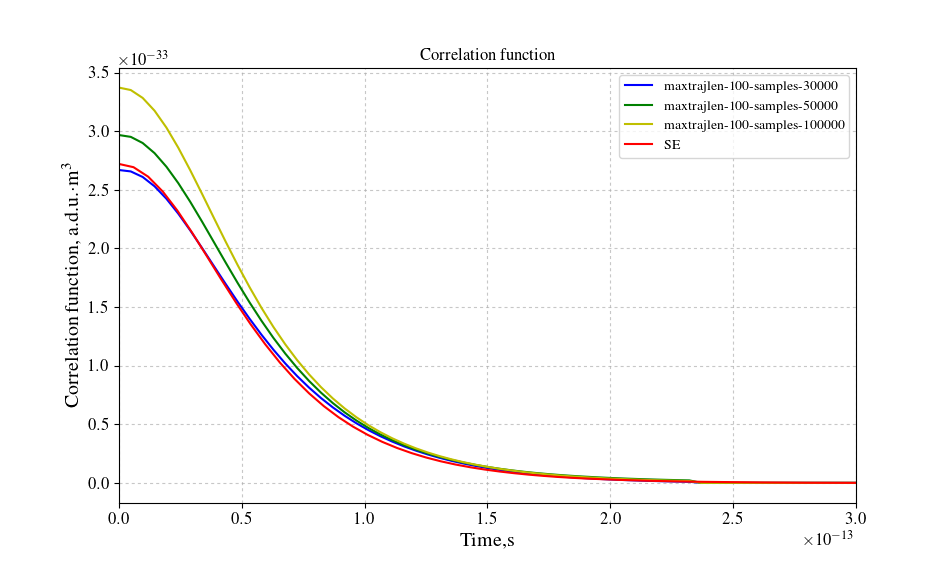

In [17]:
fig = plt.figure()
l1, = plt.plot( cf_30000[:, 0], cf_30000[:, 1], color = 'b', lw = 1.5)
l2, = plt.plot( cf_50000[:, 0], cf_50000[:, 1], color = 'g', lw = 1.5)
l3, = plt.plot( cf_100000[:, 0], cf_100000[:, 1], color = 'y', lw = 1.5)
l4, = plt.plot( cf_SE[:, 0], cf_SE[:, 1], color = 'r', lw = 1.5)

plt.xlim((0.0, 3.0e-13))

plt.title('Correlation function')
plt.xlabel('Time,s ')
plt.ylabel(u'Correlation function, a.d.u.$\cdot$m$^3$')

plt.legend((l1, l2, l3, l4), ('maxtrajlen-100-samples-30000', 'maxtrajlen-100-samples-50000', 'maxtrajlen-100-samples-100000', 'SE'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


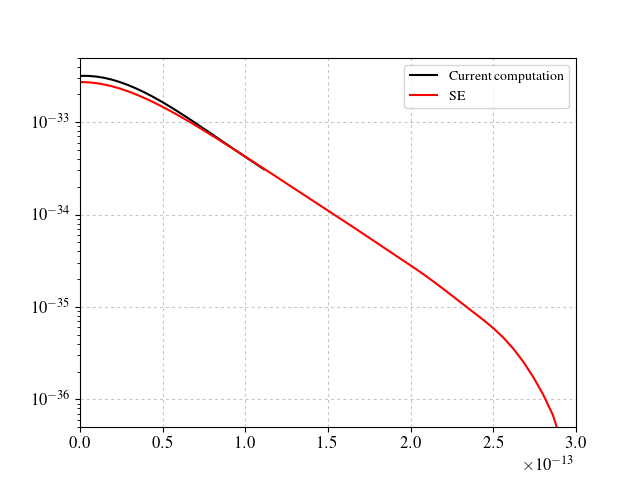

In [12]:
fig = plt.figure()
l1, = plt.semilogy( cf_30000[:, 0], cf_30000[:, 1], color = 'k', lw = 1.5)
l2, = plt.semilogy( cf_SE[:, 0], cf_SE[:, 1], color = 'r', lw = 1.5)

plt.xlim((0.0, 3.0e-13))
plt.ylim((5.0e-37, 5.0e-33))

plt.legend((l1, l2), ('Current computation', 'SE'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


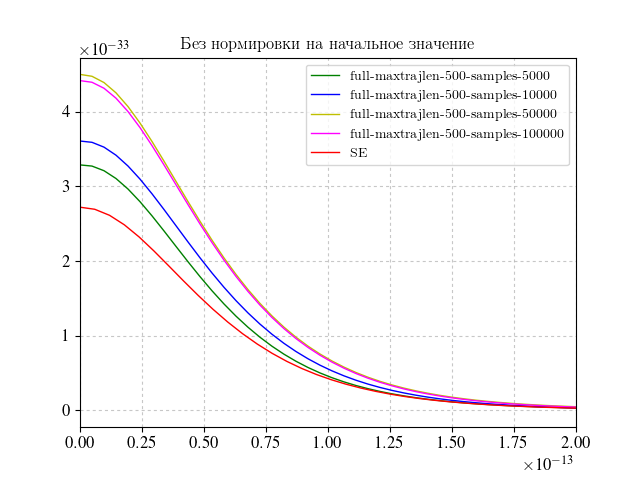

<IPython.core.display.Javascript object>


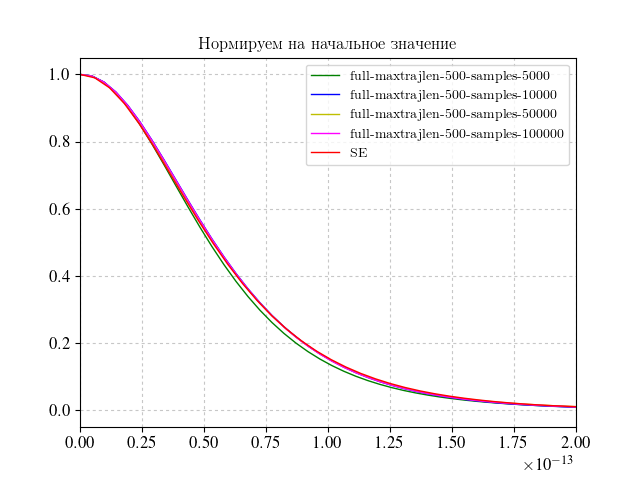

<IPython.core.display.Javascript object>


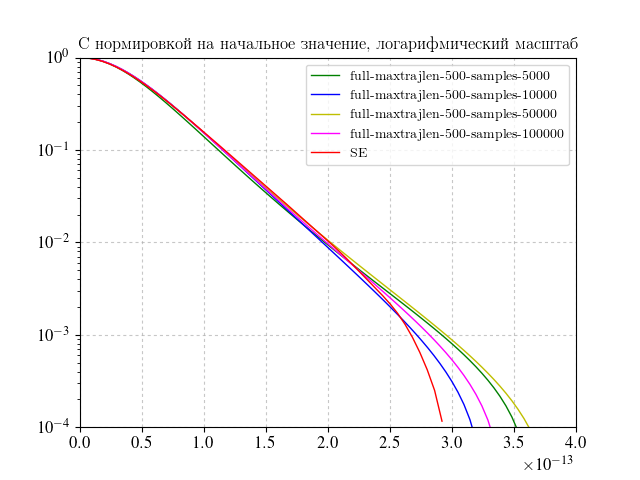

In [38]:
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat", delimiter = " " ) # функция рассчитанная Локштановым
cf_full_5000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_5000/eqcorr_final.txt", delimiter = " ")
cf_full_10000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_10000/eqcorr_final.txt", delimiter = " ")
cf_full_50000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_50000/eqcorr_final.txt", delimiter = " ")
cf_full_100000 = np.loadtxt("./experiments/full_maxtrajlen_500_samples_100000/eqcorr_final.txt", delimiter = " ")

# без нормировки на начальное значение
fig = plt.figure()
plt.title(u'Без нормировки на начальное значение')
l1, = plt.plot( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.plot( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.plot( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.plot( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))

plt.xlim((0.0, 2e-13))
plt.grid(linestyle = ':', alpha = 0.7)

# нормируем на начальное значение
cf_SE[:,1] /= cf_SE[0,1]
cf_full_5000[:,1] /= cf_full_5000[0,1]
cf_full_10000[:,1] /= cf_full_10000[0,1]
cf_full_50000[:,1] /= cf_full_50000[0, 1]
cf_full_100000[:,1] /= cf_full_100000[0, 1]

fig = plt.figure()
plt.title(u'Нормируем на начальное значение')
l1, = plt.plot( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.plot( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.plot( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.plot( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))

plt.xlim((0.0, 2e-13))
plt.grid(linestyle = ':', alpha = 0.7)

fig = plt.figure()
plt.title(u'С нормировкой на начальное значение, логарифмический масштаб')
l1, = plt.semilogy( cf_full_5000[:,0], cf_full_5000[:,1], color = 'g', lw = 1.0)
l2, = plt.semilogy( cf_full_10000[:, 0], cf_full_10000[:, 1], color = 'b', lw = 1.0)
l3, = plt.semilogy( cf_full_50000[:, 0], cf_full_50000[:, 1], color = 'y', lw = 1.0)
l4, = plt.semilogy( cf_full_100000[:, 0], cf_full_100000[:, 1], color = 'magenta', lw = 1.0)
l5, = plt.semilogy( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('full-maxtrajlen-500-samples-5000', 
                              'full-maxtrajlen-500-samples-10000', 
                              'full-maxtrajlen-500-samples-50000',
                              'full-maxtrajlen-500-samples-100000',
                              'SE'))
plt.xlim((0.0, 4.0e-13))
plt.ylim((1e-4, 1.0))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


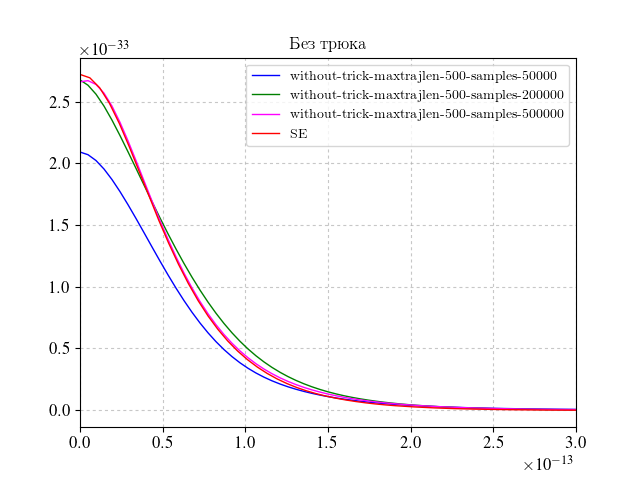

<IPython.core.display.Javascript object>


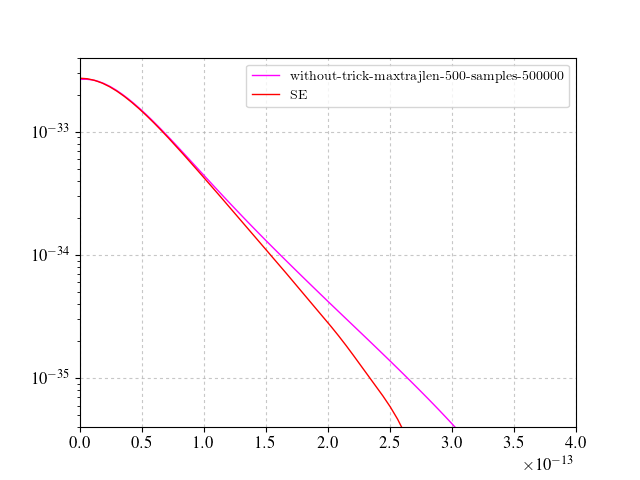

<IPython.core.display.Javascript object>


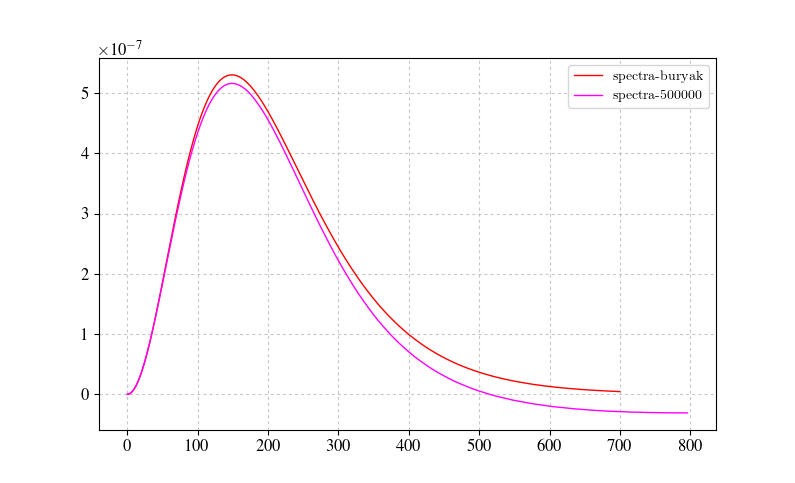

In [34]:
without_trick_cf_50000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_50000/eqcorr_final.txt")
without_trick_cf_200000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_200000/eqcorr_final.txt")
without_trick_cf_500000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_500000/eqcorr_final.txt")

cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")

fig = plt.figure()
plt.title(u'Без трюка')
l1, = plt.plot( without_trick_cf_50000[:,0], without_trick_cf_50000[:,1], color = 'b', lw = 1.0)
l2, = plt.plot( without_trick_cf_200000[:,0], without_trick_cf_200000[:,1], color = 'g', lw = 1.0)
l3, = plt.plot( without_trick_cf_500000[:,0], without_trick_cf_500000[:,1], color = 'magenta', lw = 1.0)
l4, = plt.plot( cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0 )

plt.legend((l1, l2, l3, l4), ('without-trick-maxtrajlen-500-samples-50000',
                              'without-trick-maxtrajlen-500-samples-200000',
                              'without-trick-maxtrajlen-500-samples-500000',
                              'SE'))
plt.xlim((0.0, 3.0e-13))
plt.grid(linestyle = ':', alpha = 0.7)

fig = plt.figure()

l3, = plt.semilogy(without_trick_cf_500000[:,0], without_trick_cf_500000[:,1], color = 'magenta', lw = 1.0)
l4, = plt.semilogy(cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)

plt.legend((l3, l4), ('without-trick-maxtrajlen-500-samples-500000',
                      'SE'))

plt.xlim((0.0, 4.0e-13))
plt.ylim((4.0e-36, 4.0e-33))
plt.grid(linestyle = ':', alpha = 0.7)

###############################
# сравнение спектров
spectra_500000 = np.loadtxt("./experiments/without_trick_maxtrajlen_500_samples_500000/spectrum.txt")
spectra_buryak = np.loadtxt("../trueCorrelationFunction/spectrum_buryak_dipole.txt")

fig = plt.figure()

l1, = plt.plot( spectra_buryak[:,0], spectra_buryak[:,1], color = 'r', lw = 1.0)
l2, = plt.plot( spectra_500000[:,0], spectra_500000[:,1], color = 'magenta', lw = 1.0)

plt.legend((l1, l2), ('spectra-buryak', 'spectra-500000'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


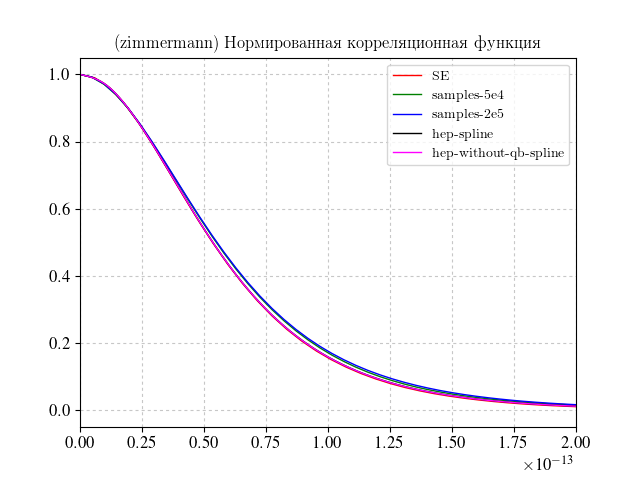

<IPython.core.display.Javascript object>


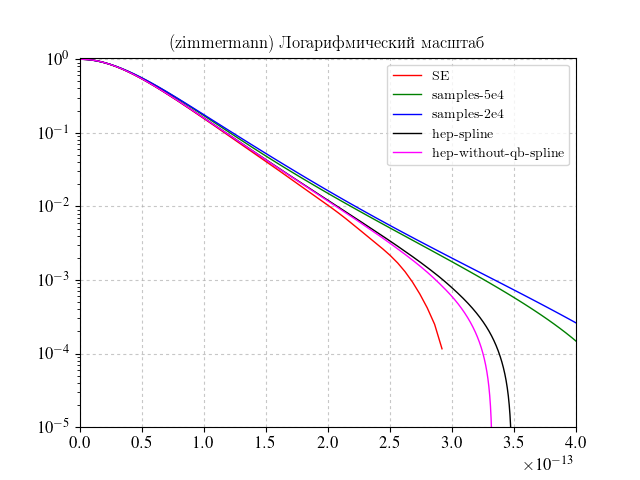

<IPython.core.display.Javascript object>


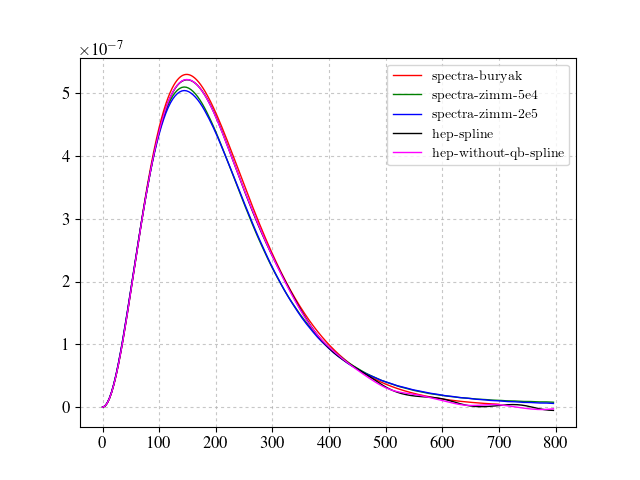

<IPython.core.display.Javascript object>


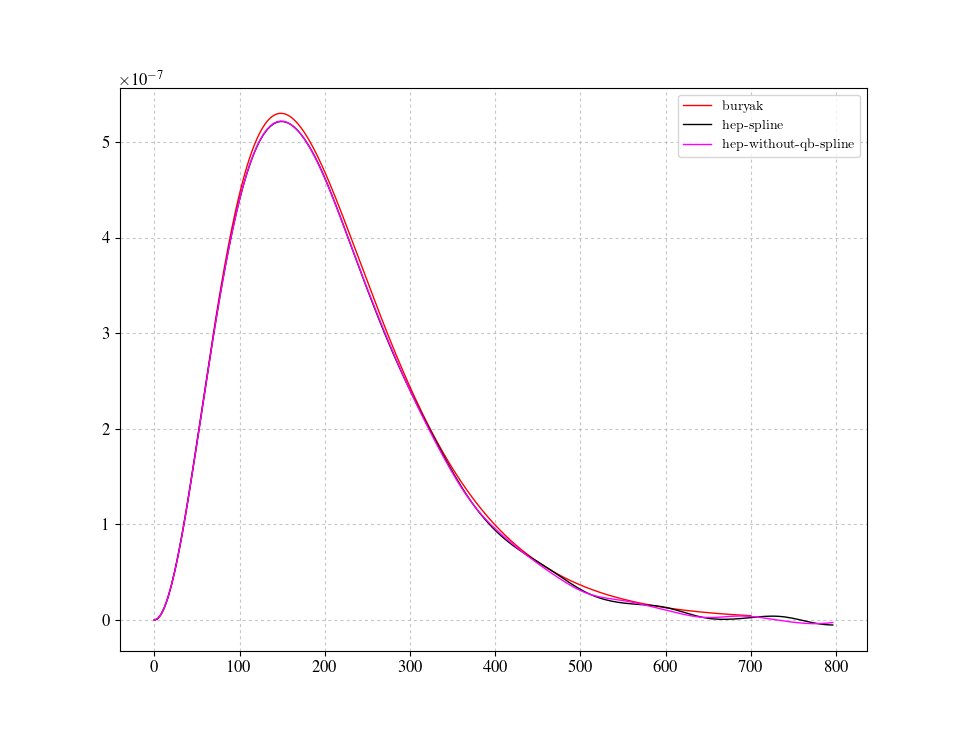

In [17]:
# zimmermann trick
# корреляционные функции
cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")
cf_SE[:,1] /= cf_SE[0,1]

cf_50000 = np.loadtxt("./experiments/zimmermann_maxtrajlen_500_samples_50000/eqcorr_final.txt")
cf_200000 = np.loadtxt('./experiments/zimmermann_maxtrajlen_500_samples_200000/eqcorr_final.txt')

cf_hep_spline = np.loadtxt("../hep_correlation_simple/main/results/correlation_odyssey_spline.txt")
cf_hep_spline[:,1] /= cf_hep_spline[0,1]

cf_hep_without_qb_spline = np.loadtxt("../hep_correlation_without_quasibound/main/results/correlation_odysset_spline.txt")
cf_hep_without_qb_spline[:,1] /= cf_hep_without_qb_spline[0,1]

fig = plt.figure()
plt.title(u'(zimmermann) Нормированная корреляционная функция')

l1, = plt.plot(cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)
l2, = plt.plot(cf_50000[:,0], cf_50000[:,1], color = 'g', lw = 1.0)
l3, = plt.plot(cf_200000[:,0], cf_200000[:,1], color = 'b', lw = 1.0)
l4, = plt.plot( cf_hep_spline[:,0], cf_hep_spline[:,1], color = 'k', lw = 1.0)
l5, = plt.plot( cf_hep_without_qb_spline[:,0], cf_hep_without_qb_spline[:,1], color = 'magenta', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('SE', 'samples-5e4', 'samples-2e5', 'hep-spline', 'hep-without-qb-spline'))

plt.xlim((0.0, 2.0e-13))
plt.grid(linestyle = ':', alpha = 0.7)

#####################
# корреляция в логарифмическом масштабе
# размер scatter-маркера
msize = 2

fig = plt.figure()
plt.title(u'(zimmermann) Логарифмический масштаб')

l1, = plt.semilogy(cf_SE[:,0], cf_SE[:,1], color = 'r', lw = 1.0)
l2, = plt.semilogy(cf_50000[:,0], cf_50000[:,1], color = 'g', lw = 1.0)
l3, = plt.semilogy(cf_200000[:,0], cf_200000[:,1], color = 'b', lw = 1.0)
l4, = plt.semilogy(cf_hep_spline[:,0], cf_hep_spline[:,1], color = 'k', lw = 1.0)
l5, = plt.semilogy(cf_hep_without_qb_spline[:,0], cf_hep_without_qb_spline[:,1], color = 'magenta', lw = 1.0)
plt.legend((l1, l2, l3, l4, l5), ('SE', 'samples-5e4', 'samples-2e4', 'hep-spline', 'hep-without-qb-spline'))

plt.xlim((0.0, 4.0e-13))
plt.ylim((1e-5, 1.05))
plt.grid(linestyle = ':', alpha = 0.7)

#####################
# спектр
spectra_buryak = np.loadtxt("../trueCorrelationFunction/spectrum_buryak_dipole.txt")
spectra_50000 = np.loadtxt("./experiments/zimmermann_maxtrajlen_500_samples_50000/spectrum.txt")
spectra_200000 = np.loadtxt("./experiments/zimmermann_maxtrajlen_500_samples_200000/spectrum.txt")

spectra_hep_spline = np.loadtxt("../hep_correlation_simple/main/results/spectrum.txt")
spectra_hep_without_qb_spline = np.loadtxt("../hep_correlation_without_quasibound/main/results/spectrum.txt")

spectra_50000[:,1] *= 2.73669e-33 # Volume * начальное значение корреляции = \int \mu^2 \rho dГ
spectra_200000[:,1] *= 2.73669e-33 # Volume * начальное значение корреляции = \int \mu^2 \rho dГ

fig = plt.figure()

l1, = plt.plot( spectra_buryak[:,0], spectra_buryak[:,1], color = 'r', lw = 1.0)
l2, = plt.plot( spectra_50000[:,0], spectra_50000[:,1], color = 'g', lw = 1.0)
l3, = plt.plot( spectra_200000[:,0], spectra_200000[:,1], color = 'b', lw = 1.0)
l4, = plt.plot( spectra_hep_spline[:,0], spectra_hep_spline[:,1], color = 'k', lw = 1.0) 
l5, = plt.plot( spectra_hep_without_qb_spline[:,0], spectra_hep_without_qb_spline[:,1], color = 'magenta', lw = 1.0)

plt.legend((l1, l2, l3, l4, l5), ('spectra-buryak', 'spectra-zimm-5e4', 'spectra-zimm-2e5', 'hep-spline', 'hep-without-qb-spline'))
plt.grid(linestyle = ':', alpha = 0.7)

#######################
# спектры hep

fig = plt.figure()

l1, = plt.plot( spectra_buryak[:,0], spectra_buryak[:,1], color = 'r', lw = 1.0)
l2, = plt.plot( spectra_hep_spline[:,0], spectra_hep_spline[:,1], color = 'k', lw = 1.0)
l3, = plt.plot( spectra_hep_without_qb_spline[:,0], spectra_hep_without_qb_spline[:,1], color = 'magenta', lw = 1.0)

plt.legend((l1, l2, l3), ('buryak', 'hep-spline', 'hep-without-qb-spline'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


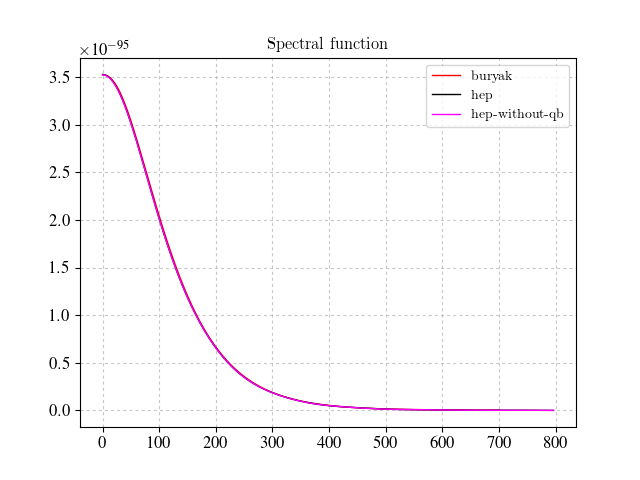

<IPython.core.display.Javascript object>


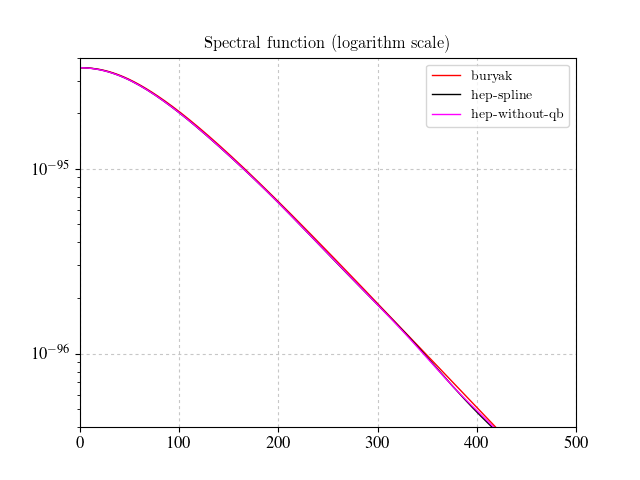

In [27]:
specfunc_buryak = np.loadtxt("../trueCorrelationFunction/specfunc_buryak_dipole.txt")
specfunc_hep = np.loadtxt("../hep_correlation_simple/main/results/specfunc.txt")
specfunc_hep_without_qb = np.loadtxt("../hep_correlation_without_quasibound/main/results/specfunc.txt")

specfunc_buryak[:,1] *= 10**-19

fig = plt.figure()
plt.title("Spectral function")
l1, = plt.plot(specfunc_buryak[:,0], specfunc_buryak[:,1], color = 'r', lw = 1.0)
l2, = plt.plot(specfunc_hep[:,0], specfunc_hep[:,1], color = 'k', lw = 1.0)
l3, = plt.plot(specfunc_hep_without_qb[:,0], specfunc_hep_without_qb[:,1], color = 'magenta', lw = 1.0)

plt.legend((l1, l2, l3), ('buryak', 'hep', 'hep-without-qb'))
plt.grid(linestyle = ':', alpha = 0.7)
           
fig = plt.figure()
plt.title("Spectral function (logarithm scale)")
l1, = plt.semilogy(specfunc_buryak[:,0], specfunc_buryak[:,1], color = 'r', lw = 1.0)
l2, = plt.semilogy(specfunc_hep[:,0], specfunc_hep[:,1], color = 'k', lw = 1.0)
l3, = plt.semilogy(specfunc_hep_without_qb[:,0], specfunc_hep_without_qb[:,1], color = 'magenta', lw = 1.0)

plt.xlim((0.0, 500.0))
plt.ylim((4e-97, 4e-95))

plt.legend((l1, l2, l3), ('buryak', 'hep-spline', 'hep-without-qb'))
plt.grid(linestyle = ':', alpha = 0.7)

<IPython.core.display.Javascript object>


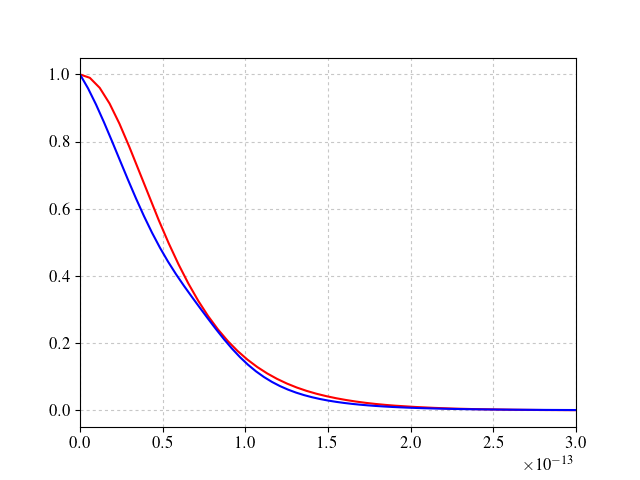

In [32]:
cf_transformed_space = np.loadtxt("./eqcorr_final.txt")
cf_transformed_space[:,1] /= cf_transformed_space[0,1]

cf_SE = np.loadtxt("../trueCorrelationFunction/CF_norm.dat")
cf_SE[:,1] /= cf_SE[0,1]

fig = plt.figure()

plt.plot(cf_SE[:,0], cf_SE[:,1], color = 'r')
plt.plot(cf_transformed_space[:,0], cf_transformed_space[:,1], color = 'b')

plt.xlim((0.0, 3.0e-13))

plt.grid(linestyle = ':', alpha = 0.7)